<a href="https://colab.research.google.com/github/wbandabarragan/Bootcamp2025/blob/main/CursoA_Semana1/Clase_01/Clase_1f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data I/O, pandas, and interactive widgets

In this lecture we will look into data I/O with pandas, 1D data analysis (spectral fitting) and astropy.

The packages are:

- Pandas: https://pandas.pydata.org
- Astropy: https://www.astropy.org

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Review of Data I/O

- Native open() function
- Third-party pandas library

### I/O with open():

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Generate some sample data

data_1 = np.arange(0., 10., 1.)
data_2 = np.arange(10., 20., 1.)
data_3 = np.arange(20., 30., 1.)

#print(data_1, data_2, data_3)

In [ ]:
# Now let's write these vectors as columns into a data file
file = open("/content/drive/MyDrive/ISYA2025/test_file.txt", "w")

# Write vectors as columns
for i in range(len(data_1)):
    print(data_1[i], data_2[i], data_3[i], file = open("/content/drive/MyDrive/ISYA2025/test_file.txt", "a"))

file.close()

### I/O with Pandas

In [ ]:
import pandas as pd

In [ ]:
data_dict = {'Column_Ones': data_1, 'Column_Twenties': data_2, 'Column_Thirties': data_3}

# Create a Pandas DataFrame from the dictionary
df = pd.DataFrame(data_dict)

#print(df)

# Save file with CSV format

df.to_csv("/content/drive/MyDrive/ISYA2025/test_file.csv", index=False)

## Exercise: Moving Plane Waves and Loops

### Moving wave:

$y = A\sin(kx-\omega t)$

In [ ]:
import os

In [ ]:
# Time vector
t = np.arange(0, 16*np.pi, 0.1)

# X vectors:
x = np.arange(-8*np.pi, +8*np.pi, 0.5)

# Y vector
y = []

# Define the amplitud, spatial and time frequencies
a = 2.
k_1 = 1.
w_1 = 0.1

# Loop
for i in range(len(t)):

    y.append(a*np.sin(k_1*x - w_1*i))

    data_dict = {'x': x, 'y': y[0]}
    df = pd.DataFrame(data_dict)
    #fname = os.path.join("/content/drive/MyDrive/ISYA2025", f"moving_wave_{i:03d}.csv")
    #df.to_csv(fname, index=False)

y = np.array(y)

#print(x.shape, y.shape)

## 2. 2D visualisation:

In [ ]:
# Meshgrid

x_2d, t_2d = np.meshgrid(x,t)

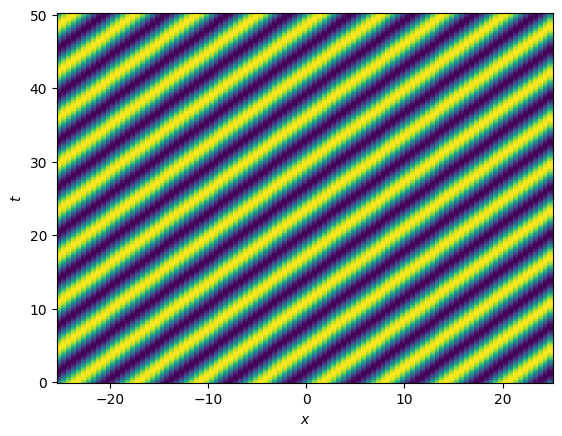

In [ ]:
plt.figure()

plt.pcolor(x_2d, t_2d, y)

plt.xlabel(r"$x$")
plt.ylabel(r"$t$")

plt.show()

### 3. The IPython + matplotlib libraries:

In [ ]:
from matplotlib import animation
from IPython import display

In [ ]:
%%capture

# Empty figure environment
fig, ax = plt.subplots(1, 1, figsize=(6,4))
line, = ax.plot([],[])
ax.set_xlim(-8*np.pi, 8*np.pi)
ax.set_ylim(-5., 5.)
plt.title("Travelling plane wave")

# Animation function
def animate_wave(i):
    """
    Function to create animation based on the empty fig. env.
    """
    y_i = y[i, :]
    line.set_data(x, y_i)
    return line

# Create animation
movie_wave = animation.FuncAnimation(fig, animate_wave, frames = len(t), interval = 0.1)

In [ ]:
# Visualisation

#display.HTML(movie_wave.to_jshtml())

## Exercise: Cosmological Redshift and Age of the Universe

The expansion of the Universe causes cosmological redshifts ($z$) of spectral lines that are currently ($z=0$) in their rest frames. The relationship between the observed wavelength $\lambda_{\text{obs}}$ and the wavelength emitted by a distant object $\lambda_{\text{em}}$ located at a redshift $z$ is given by:

$\lambda_{\text{obs}} = \lambda_{\text{em}} (1 + z)$

Since frequency $\nu$ is inversely proportional to wavelength, then:

$\nu_{\text{obs}} = \frac{\nu_{\text{em}}}{1 + z}$

Furthermore, the age of the Universe at a given $z$ can be calculated by integrating the inverse of the Hubble parameter:

$t(z) = \int_{z}^{\infty} \frac{1}{(1+z') H(z')} d{z'}$

The cosmological scale factor $a(t)$ is related to redshift through:

$a = \frac{1}{1+z}$

In the $\Lambda$-CDM model, the Hubble parameter $H(z)$ is expressed as:

$H(z) = H_0 \sqrt{\Omega_m (1+z)^3 + \Omega_r (1+z)^4 + \Omega_\Lambda}$

Where:

- $H_0$: Hubble constant at the present time.
  
- $\Omega_m$: Matter density parameter
  
- $\Omega_r$: Radiation density parameter

- $\Omega_\Lambda$: Dark energy density parameter

In [ ]:
from ipywidgets import interact, FloatSlider, Checkbox, VBox
from scipy.integrate import quad

In [ ]:
# Cosmological parameters (standard cosmological model)
H0 = 70.0  # Hubble constant in km/s/Mpc
Omega_m = 0.27  # Matter density parameter (dark + baryonic)
Omega_r = 0.0  # Radiation density parameter (can be taken as zero)
Omega_Lambda = 0.73  # Dark energy density parameter

# Conversion constants
H0_in_s = H0 * 3.24078e-20  # Convert H0 from km/s/Mpc to 1/s
Mpc_in_km = 3.085677581e19  # 1 Mpc in kilometers
s_to_Gyr = 3.16888e-17  # 1 second in Gyr


In [ ]:
# Hubble parameter as a function of redshift
def H_z(z, H0, Omega_m, Omega_r, Omega_Lambda):
    """
    Calculates H(z) using the Lambda-CDM model.
    Inputs: z -> Redshift, H0 -> Hubble Constant (in km/s/Mpc),
              Omega_m -> Dark/baryonic matter density,
              Omega_r -> Radiation density,
              Omega_Lambda: Dark energy density
    Output: H(z) in km/s/Mpc
    """
    return H0 * np.sqrt(Omega_m * (1 + z)**3 + Omega_r * (1 + z)**4 + Omega_Lambda)

# Function to calculate the integrand for the age of the Universe
def integrand(z, H0, Omega_m, Omega_r, Omega_Lambda):
    """
    Calculates the integral 1 / [(1 + z) H(z)] to find the age of the Universe.
    """
    return 1 / ((1 + z) * H_z(z, H0, Omega_m, Omega_r, Omega_Lambda))

# Age of the Universe at redshift z
def age_of_universe(z, H0=H0_in_s, Omega_m=Omega_m, Omega_r=Omega_r, Omega_Lambda=Omega_Lambda):
    """
    Calculates the age of the Universe in Gyr for a given redshift z.
    Inputs: z -> Redshift
              H0, Omega_m, Omega_r, Omega_Lambda -> Cosmological parameters
    Output: Age of the Universe in Gyr
    """
    # Performs the integration from z to infinity
    age, _ = quad(integrand, z, np.inf, args=(H0, Omega_m, Omega_r, Omega_Lambda))
    return age * s_to_Gyr  # Converts age from seconds to Gyr

# Function to calculate H(z) and the age of the Universe
def calculate_Hz_and_age(z):
    """
    Calculates H(z) and the age of the Universe for a given redshift z.
    Inputs:
        z: Redshift
    Output:
        Hz: Hubble parameter in km/s/Mpc
        age: Age of the Universe in Gyr
    """
    # Calculate H(z)
    Hz = H_z(z, H0, Omega_m, Omega_r, Omega_Lambda)

    # Calculate the age of the Universe
    age = age_of_universe(z, H0=H0_in_s, Omega_m=Omega_m, Omega_r=Omega_r, Omega_Lambda=Omega_Lambda)

    return Hz, age

# Synthetic Lyman alpha line
def linea_espectral(x_val, mu, sigma, n_points):
    """
    This returns the values for a normal distro.
    Inputs: x_val -> x axis, mu -> mean, sigma -> std. dev., n_points -> number of points for noise
    Output: y
    """

    # Gaussian function
    coef_g = 1./(sigma*(np.sqrt(2*np.pi)))

    y_val = coef_g*np.exp(-0.5*(x_val - mu)**2/sigma**2)

    # Seed for random generator
    np.random.seed(77)

    # Adding noise
    n_val = 1.e-4*np.random.normal(0., 1., size = (n_points,))

    # Adding a baseline
    b_val = 0.1

    y = y_val + n_val + b_val

    return y

# Cosmological redshift function
def z_cosmologico(l_0, z):
    """
    Function that calculates the cosmological redshift of a line
    in a rest frame (z=0).
    Input: l_0 -> base spectral line wavelength
    Output: l_obs -> observed wavelength.
    """
    l_obs = l_0*(1. + z)
    return l_obs

def save_data_to_csv(z_value, age_value, filename='cosmo_data.csv'):
    """
    Saves redshift (z) and age of the Universe to a CSV file.
    Appends to the file if it exists, creates it if not.
    """
    data = {'redshift': [z_value], 'age_Gyr': [age_value]}
    df = pd.DataFrame(data)

    return None

In [ ]:

# Plotting function
def plot_lines(z, show_Lyman_alpha, show_H_alpha):
    # Wavelengths for Lyman-alpha and H-alpha
    l_lyman_alpha = 1216  # Lambda for Lyman-alpha (in Angstroms)
    l_h_alpha = 6563  # Lambda for H-alpha (in Angstroms)
    sigma_1 = 50  # Standard deviation of the Gaussian spectral line
    n_points = 10000  # Number of points to be considered

    # Example usage
    Hz, age = calculate_Hz_and_age(z)

    # Output CSV file
    save_data_to_csv(z, age)

    # Lambda axis
    x = np.linspace(0, 16000, n_points)

    # Graph
    plt.figure(figsize=(12,5))

    plt.title(f"Hubble constant H(z) is {Hz:.2f} km/s/Mpc and the age of the Universe is {age:.2f} Gyr for z = {z}")

    # Visible spectrum range (400 nm to 700 nm)
    visible_min = 4000  # 400 nm in Angstroms
    visible_max = 7000  # 700 nm in Angstroms

    plt.fill_between(x, 0, 1, where=(x >= visible_min) & (x <= visible_max), color='pink', alpha=0.5, label="Visible Range")

    # Label the visible spectrum
    plt.axvline(visible_min, color='black', linestyle='--')
    plt.axvline(visible_max, color='black', linestyle='--')

    # Lyman Alpha
    if show_Lyman_alpha:
        # Lyman alpha profile
        y_lyman = linea_espectral(x, l_lyman_alpha, sigma_1, n_points)
        # Shift the Lyman-alpha line according to the redshift
        l_obs_lyman = z_cosmologico(l_lyman_alpha, z)
        y_obs_lyman = linea_espectral(x, l_obs_lyman, sigma_1, n_points)
        plt.plot(x, y_lyman, color = "red", label=r"Lyman $\alpha$ at z=0.0")
        plt.plot(x, y_obs_lyman, color = "blue", label=rf"Lyman $\alpha$ at z={z}")

    # H Alpha
    if show_H_alpha:
        # H-alpha profile
        y_h_alpha = linea_espectral(x, l_h_alpha, sigma_1, n_points)
        # Shift the H-alpha line according to the redshift
        l_obs_h_alpha = z_cosmologico(l_h_alpha, z)
        y_obs_h_alpha = linea_espectral(x, l_obs_h_alpha, sigma_1, n_points)
        plt.plot(x, y_h_alpha, color = "brown", label=r"H$_\alpha$ at z=0")
        plt.plot(x, y_obs_h_alpha, color = "darkblue", label=f"H Alpha at z={z}")

    # Labels
    plt.grid(True)
    plt.xlim(0, 16000)
    plt.ylim(0.095, 0.11)
    plt.xlabel(r"$\lambda\,[\text{Angstroms}]$")
    plt.ylabel(r"$N$")
    plt.legend(loc = 4)
    plt.show()

# Interactive controls for z and option checkboxes for lines
z_scroll = FloatSlider(value=0, min=0, max=10, step=0.1, description=r'$z$')

lyman_c = Checkbox(value=True, description=rf"Show Ly$\alpha$ at $\lambda_0=1216\,\rm A$")
halph_c = Checkbox(value=False, description=rf"Show H$\alpha$ at $\lambda_0=6563\,\rm A$")

# Display the interactive widgets
#interact(plot_lines, z=z_scroll , show_Lyman_alpha=lyman_c, show_H_alpha=halph_c)